In [47]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import json
onlyfiles = [f for f in listdir("./csvFolder") if isfile(join("./csvFolder", f))]
onlyfiles




['csv-2023-12-15-07-27-16-none-1035-iPhone11-0-61.24-75.30-6.97-07-27-59.978.csv',
 'csv-2023-12-15-16-52-16-snore-1035-iPhone11-3-6.18-15.22-45.92-16-52-44.584.csv',
 'csv-2023-12-15-07-43-16-none-1035-iPhone11-0-71.89-35.20-18.72-07-43-37.259.csv',
 'csv-2023-12-15-12-18-16-none-1035-iPhone11-0-7.52-40.06-34.86-12-18-38.529.csv',
 'csv-2023-12-15-10-17-16-snore-1035-iPhone11-15-48.37-57.84-80.37-10-17-31.930.csv',
 'csv-2023-12-15-13-41-16-snore-1035-iPhone11-11-51.91-56.91-73.39-13-41-10.802.csv',
 'csv-2023-12-15-15-27-16-snore-1035-iPhone11-14-80.29-15.53-44.00-15-27-44.008.csv',
 'csv-2023-12-15-16-37-16-snore-1035-iPhone11-1-44.51-43.01-89.02-16-37-53.972.csv',
 'csv-2023-12-15-11-08-16-snore-1035-iPhone11-15-80.46-53.57-16.19-11-08-26.859.csv',
 'csv-2023-12-15-07-41-16-none-1035-iPhone11-0-42.49-68.52-10.42-07-41-40.658.csv',
 'csv-2023-12-15-09-17-16-snore-1035-iPhone11-15-75.54-81.97-89.89-09-17-14.562.csv',
 'csv-2023-12-15-13-43-16-snore-1035-iPhone11-2-25.45-29.57-29.17-1

In [48]:
def parse_file_name(file_name):
    pattern = r'csv-(\d{4}-\d{2}-\d{2})-(\d{2}-\d{2}-\d{2})-(\w+)-(\d+)-iPhone\d+-(\d+)-(\d+\.\d+)-(\d+\.\d+)-(\d+\.\d+)-(\d{2}-\d{2}-\d+\.\d+)\.csv'
    match = re.match(pattern, file_name)
    if match:
        return {
            'date': match.group(1),
            'time': match.group(2),
            'event_type': match.group(3),
            'version': int(match.group(4)),
            'snore_count': int(match.group(5)),
            'avg_db': float(match.group(6)),
            'max_db': float(match.group(7)),
            'start_db': float(match.group(8)),
            'start_timestamp': match.group(9)
        }
    else:
        raise Exception('Not possible')

parsed_data = [parse_file_name(fn) for fn in onlyfiles if parse_file_name(fn) is not None]

df = pd.DataFrame(parsed_data)
df['datetime'] = df.apply(lambda row: datetime.strptime(f"{row['date']} {row['time']}", '%Y-%m-%d %H-%M-%S'), axis=1)
df = df.drop(['date', 'time'], axis=1)

df = df.sort_values(by='datetime')

df_hour = df.copy()

df_hour['hour'] = df['datetime'].dt.hour

df.head()

df.tail()



,event_type,version,snore_count,avg_db,max_db,start_db,start_timestamp,datetime
148,snore,1035,5,89.81,35.89,78.48,16-49-18.902,2023-12-15 16:49:16
557,none,1035,0,31.13,50.07,70.91,16-50-13.896,2023-12-15 16:50:16
190,none,1035,0,36.16,34.56,11.52,16-51-33.337,2023-12-15 16:51:16
1,snore,1035,3,6.18,15.22,45.92,16-52-44.584,2023-12-15 16:52:16
234,none,1035,0,27.35,35.68,57.96,16-53-26.441,2023-12-15 16:53:16


In [49]:
df['datetime'] = pd.to_datetime(df['datetime'])

aggregated_data = df.resample('15T', on='datetime').agg({
    'avg_db': 'mean',
    'snore_count': 'sum',
    'max_db': 'max',
    'event_type': 'first',
})

aggregated_data['start_db'] = df.resample('15T', on='datetime')['start_db'].min()

aggregated_data.reset_index(inplace=True)

aggregated_data

,datetime,avg_db,snore_count,max_db,event_type,start_db
0,2023-12-15 06:45:00,13.096667,35,86.63,none,30.38
1,2023-12-15 07:00:00,33.946667,44,80.79,snore,14.93
2,2023-12-15 07:15:00,47.883333,30,77.62,none,3.95
3,2023-12-15 07:30:00,55.586000,65,68.52,none,10.42
4,2023-12-15 07:45:00,53.983333,44,86.58,none,4.32
5,2023-12-15 08:00:00,45.506000,67,86.44,snore,18.52
6,2023-12-15 08:15:00,44.162000,47,84.41,none,25.08
7,2023-12-15 08:30:00,51.410000,64,83.65,none,1.95
8,2023-12-15 08:45:00,50.089333,79,85.61,none,2.16
9,2023-12-15 09:00:00,35.925333,15,89.97,none,1.24


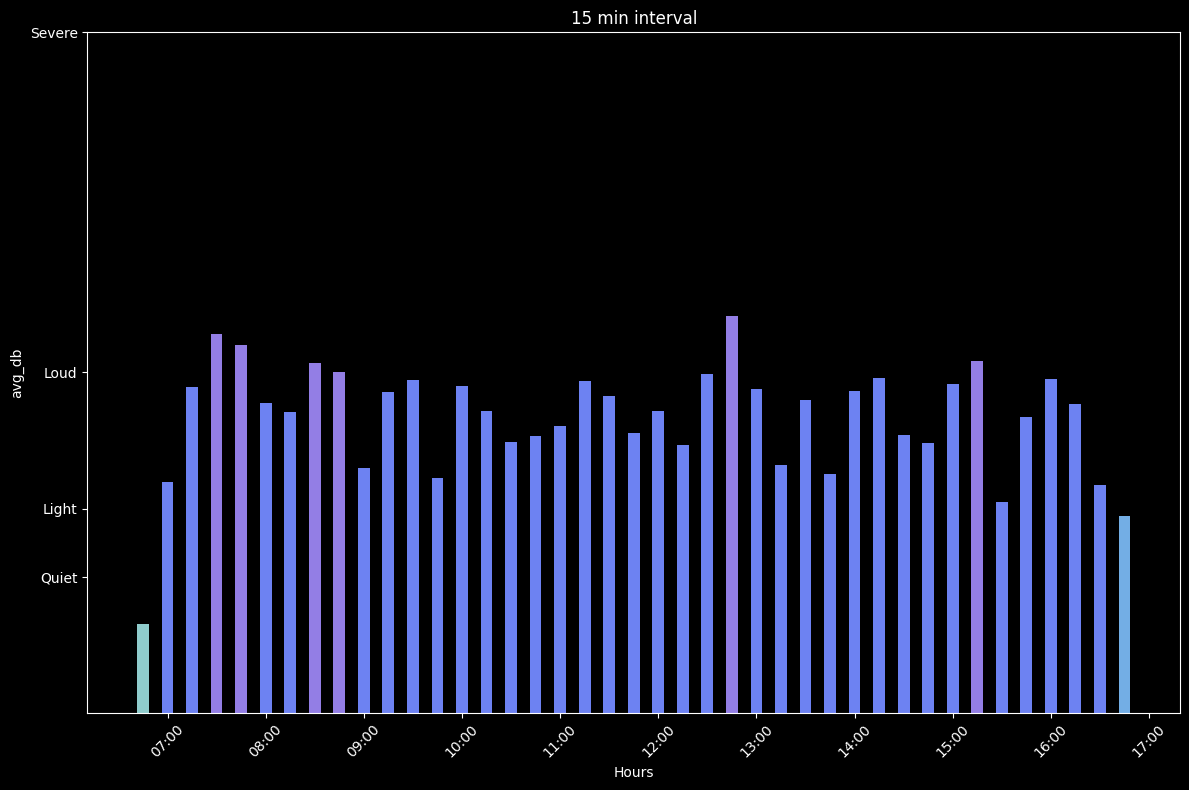

In [50]:
import matplotlib.dates as mdates



db_ranges = {
    'Quiet': (0, 20),
    'Light': (20, 30),
    'Loud': (30, 50),
    'Severe': (50, 100)
}

def get_color(db_value):
    for level, (low, high) in db_ranges.items():
        if low <= db_value < high:
            return level
    return 'Quiet'

aggregated_data['color_level'] = aggregated_data['avg_db'].apply(get_color)

color_map = {
    'Quiet': '#8fcccc',
    'Light': '#73aee5',
    'Loud': '#6d82f2',
    'Severe': '#937ee5'
}

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.005

colors = aggregated_data['color_level'].map(color_map)
ax.bar(aggregated_data['datetime'], aggregated_data['avg_db'], width=bar_width, color=colors, align='center')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

ax.set_xlabel('Hours')
ax.set_ylabel('avg_db')
ax.set_title('15 min interval')

ax.set_yticks([20, 30, 50, 100])
ax.set_yticklabels(['Quiet', 'Light', 'Loud', 'Severe'])

plt.tight_layout()

plt.show()

In [56]:

api_json_object = json.loads(aggregated_data.to_json(orient='records', date_format='iso'))


with open("dump_graph.json", 'w') as f:
    json.dump(api_json_object, f, indent=4)

f.close()



api_json_object[:5]  # Show only the first 5 records for brevity


TypeError: dump() missing 1 required positional argument: 'fp'